<a href="https://colab.research.google.com/github/ankitg-02/data_analysis/blob/main/consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing data from excelsheet
consumer_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")

In [4]:
#count of consumer
count_conumer=0
for i in consumer_sales['Segment']:
  if i=='Consumer':
    count_conumer+=1
print("count of conumers=",count_conumer)

count of conumers= 5191


In [5]:
#count of each product under consumer segment
record=consumer_sales.groupby('Segment')
print(record.Category.get_group("Consumer").value_counts())
quantity_of_category=record.Category.get_group("Consumer").value_counts()

Office Supplies    3127
Furniture          1113
Technology          951
Name: Category, dtype: int64


In [6]:
#details for the bar-graph
Consumer_category=['Office Supplies','Furniture','Technology']
print(Consumer_category)
Consumer_category_quantity=np.array(quantity_of_category)
print(Consumer_category_quantity)

['Office Supplies', 'Furniture', 'Technology']
[3127 1113  951]


Text(0.5, 1.0, 'Sales by Consumer')

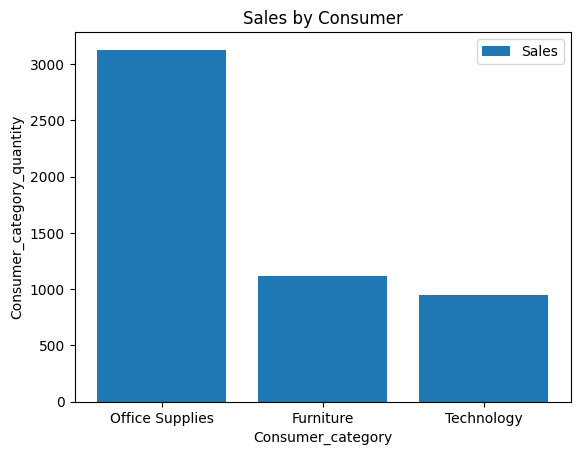

In [7]:
plt.xlabel("Consumer_category")
plt.ylabel("Consumer_category_quantity")
plt.bar(Consumer_category,Consumer_category_quantity,label='Sales')
plt.legend()
plt.title("Sales by Consumer")